<a href="https://colab.research.google.com/github/HakujouRyu/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

In [31]:
!pip install pandas==0.23.4

     |████████████████████████████████| 8.9MB 2.8MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=0.24.0, but you'll have pandas 0.23.4 which is incompatible.
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2


In [0]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/HakujouRyu/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')

In [70]:
df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [0]:
#Let's clean this up
df.drop(columns='Unnamed: 0', inplace=True)

In [72]:
df.head()

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


In [73]:
#Let's see what we have
df.describe()

,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000
mean,48.396667,153.540833,134.910833
std,18.166802,35.132182,85.548895
min,18.000000,100.000000,0.000000
25%,33.000000,125.000000,65.000000
50%,48.000000,149.000000,122.000000
75%,64.000000,180.250000,206.000000
max,80.000000,246.000000,300.000000


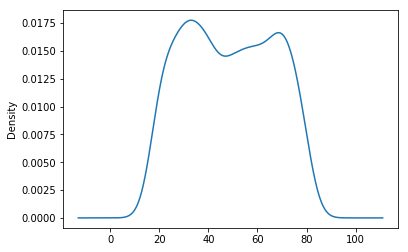

In [74]:
df['age'].plot.density()

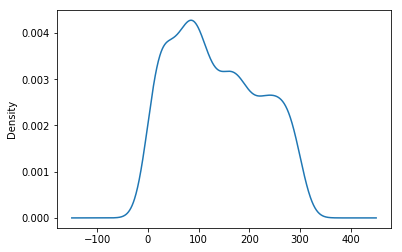

In [75]:
df['exercise_time'].plot.density()

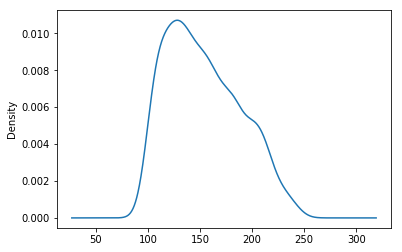

In [81]:
df['weight'].plot.density()

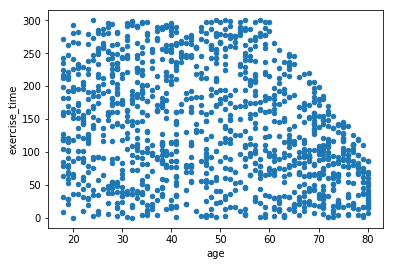

In [83]:
df.plot.scatter('age', 'exercise_time')

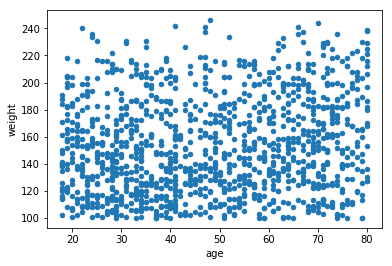

In [77]:
df.plot.scatter('age', 'weight')

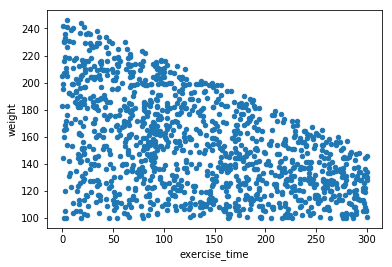

In [113]:
#That didnt seem too useful, let change what we look at.
df.plot.scatter('exercise_time', 'weight')

[Text(0, 0.5, 'exercise in minutes/week'), Text(0.5, 0, 'weight')]

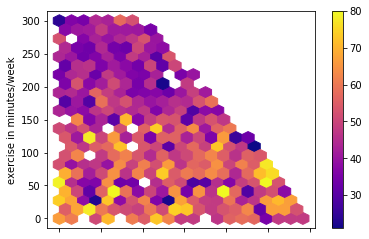

In [131]:
plot = df.plot.hexbin('weight', 'exercise_time', 'age',gridsize= 20, cmap='plasma')
plot.set(xlabel='weight', ylabel='exercise in minutes/week')

In [0]:
#That seems to tell a better story.

weight = pd.cut(df['weight'], 10)
time = pd.cut(df['exercise_time'], 10)
age = pd.cut(df['age'], 10)

In [79]:
pd.crosstab(weight, [time, age])

exercise_time     (-0.3, 30.0]      ...       (270.0, 300.0]
age             (17.938, 24.2]      ...         (55.2, 61.4]
weight                              ...                     
(99.854, 114.6]              0      ...                    3
(114.6, 129.2]               2      ...                    2
(129.2, 143.8]               1      ...                    5
(143.8, 158.4]               0      ...                    2
(158.4, 173.0]               0      ...                    0
(173.0, 187.6]               1      ...                    0
(187.6, 202.2]               3      ...                    0
(202.2, 216.8]               0      ...                    0
(216.8, 231.4]               1      ...                    0
(231.4, 246.0]               2      ...                    0

[10 rows x 92 columns]

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


- They are all continuous. 
- All of them are connected. But age only has a small effect on exercise time until 60.
- Exercise time has the most real relationship to weight.  

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)